# Predicting Player Value based on basic stats

## Usual Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Reading the Data

And I'm only taking the necessary columns

In [2]:
df = pd.read_csv("irngdp.csv")

df.tail(9)

,Year,GDP
54,2014,425.40
55,2015,385.88
56,2016,418.98
57,2017,454.01
58,2018,366.44
59,2019,264.01
60,2020,231.55
61,2021,359.71
62,2022,388.54


### Plotting the Data


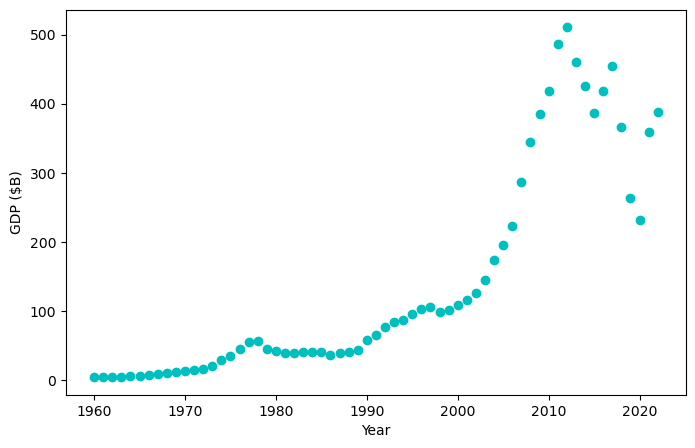

In [3]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["GDP"].values)
plt.plot(x_data, y_data, 'co')
plt.ylabel('GDP ($B)')
plt.xlabel('Year')
plt.show()

### Complex Math behind the triple logistic

An algorithm to take notice of important shock years and reverse course the graph (Thanks to AI)

In [4]:

def triple_logistic(x, L1, k1, x01, L2, k2, x02, L3, k3, x03, shock_year1, shock_year2):
    return np.where(
        x < shock_year1,
        L1 / (1 + np.exp(-k1 * (x - x01))),  # Phase 1 (1960–1979)
        np.where(
            x < shock_year2,
            L2 / (1 + np.exp(-k2 * (x - x02))),  # Phase 2 (1979–2012)
            L3 / (1 + np.exp(-k3 * (x - x03)))   # Phase 3 (2012–2022, decline)
        ))


p0 = [
    60, 0.1, 1970,    # Phase 1: Pre-1979 (L1, k1, x01)
    500, 0.05, 2000,   # Phase 2: 1979–2012 (L2, k2, x02)
    300, -0.03, 2015,  # Phase 3: Post-2012 (L3, k3, x03; negative k3 for decline)
    1979, 2012         # Shock years
]

popt, pcov = curve_fit(triple_logistic, df['Year'], df['GDP'], p0=p0, maxfev=10000)

C:\Users\130\AppData\Local\Temp\ipykernel_2040\643066548.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(triple_logistic, df['Year'], df['GDP'], p0=p0, maxfev=10000)


### Plotting

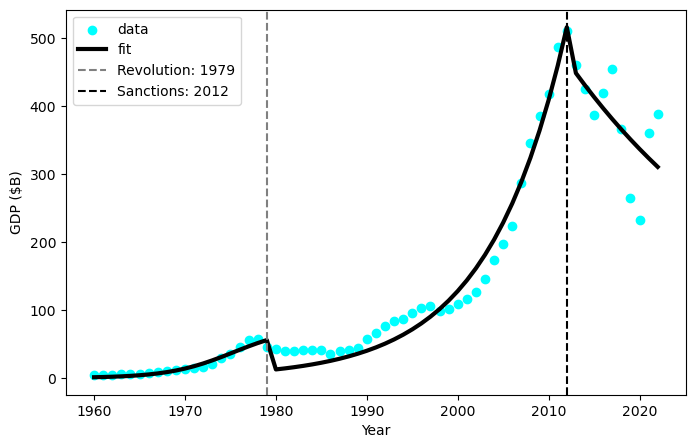

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Year'].values, df['GDP'].values, color='cyan', label='data')
plt.plot(df['Year'], triple_logistic(df['Year'], *popt), linewidth=3.0, label='fit', color='black')

plt.axvline(popt[9], color='gray', linestyle='--', label=f'Revolution: {int(popt[9])}')
plt.axvline(popt[10], color='black', linestyle='--', label=f'Sanctions: {int(popt[10])}')

plt.xlabel('Year')
plt.ylabel('GDP ($B)')
plt.legend()
plt.show()